In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
from src.models import models
from src.models import model as mainmodel
from src.models import modelConv2d
from src.models import modelineal
from src.models import decoders
from src import loss_func
from src import train
from src import loader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src import optimizer_Factory as of
import Data.genData as genData
from src import custom_plots as cp
from src import Visual_utils as vu
import torchvision
import wandb
import random
import os


os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:2000"
torch.cuda.empty_cache() 
torch.manual_seed(42)

In [2]:
t,a = genData.generateDynamics(max=1.0, min = 0.2)
ImageGenerator = genData.create_intensity_image

frames = None
n_samples = t.shape[0]

for i in range(n_samples):
    img = ImageGenerator(a[i]).unsqueeze(0)
    frames = img if frames is None else np.vstack((frames, img))

In [6]:
frames2 = frames.reshape(n_samples, 50, 50)

(10000, 50, 50)
1.0


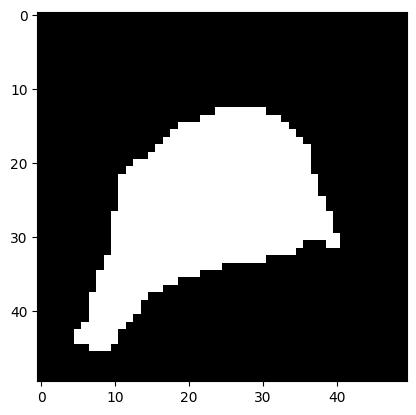

0.9669536434799968


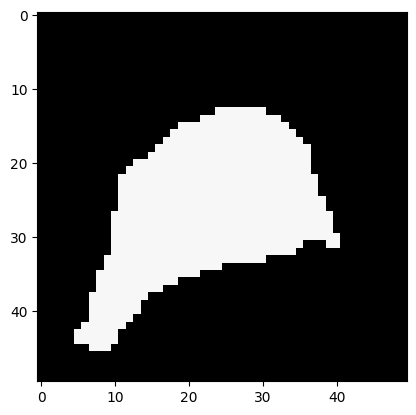

0.8764621163813984


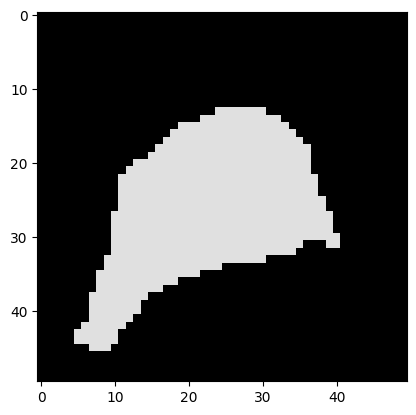

0.7432141788538279


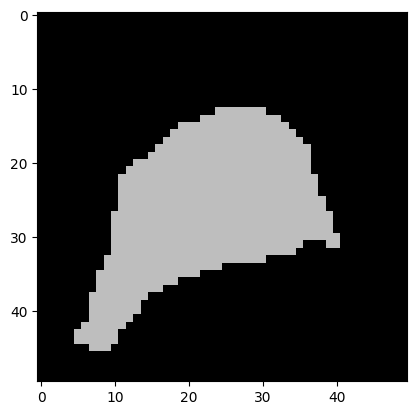

0.5885055809482952


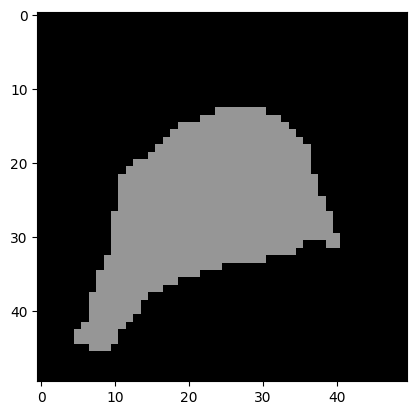

0.43683736916627514


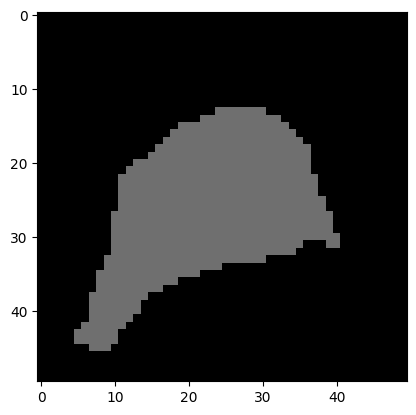

0.3120372212207173


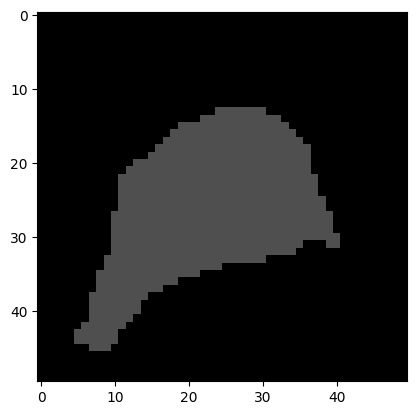

0.23351758279742213


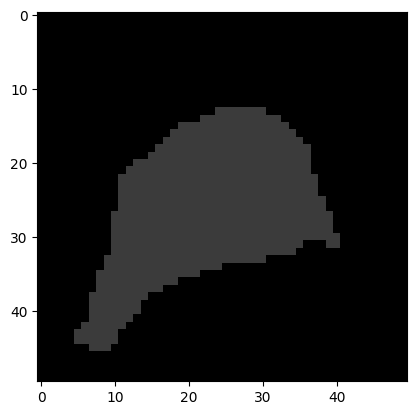

0.21325797551500186


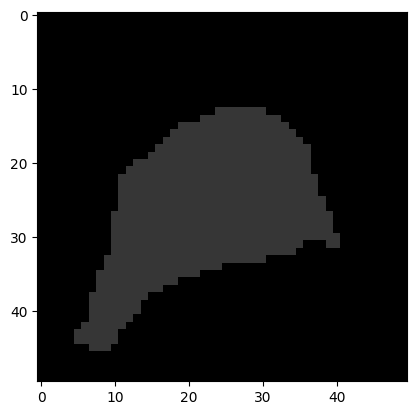

0.25398027923358707


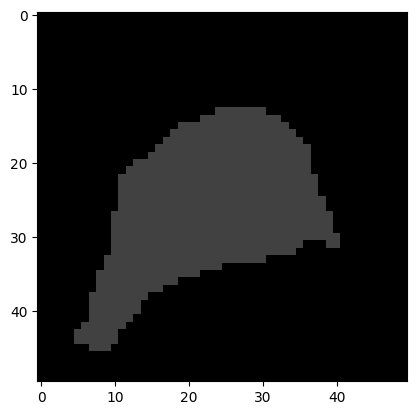

In [8]:
print(frames2.shape)


for i in range(10):
    print(a[i*20])
    plt.imshow(frames2[i*20], vmax=1, vmin=0, cmap='gray')
    plt.show()